In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

file_path = '/Users/maedehhp/Downloads/children-word-difficulty-main/data.json'
df = pd.read_excel(file_path)

quartiles = df['zipf'].quantile([0.25, 0.5, 0.75])
def zipf_bin(value):
    if value <= quartiles[0.25]:
        return 0
    elif value <= quartiles[0.5]:
        return 1
    elif value <= quartiles[0.75]:
        return 2
    else:
        return 3

df['zipf_bin'] = df['zipf'].apply(zipf_bin)

remaining_idx = df.index.tolist()
subset_labels = pd.Series(index=df.index, dtype=int)

for i in range(22):
    temp_df = df.loc[remaining_idx]
    test_size = len(remaining_idx) - len(remaining_idx) // (23 - i)
    sss = StratifiedShuffleSplit(n_splits=1, test_size=test_size, random_state=42 + i)
    for train_idx, test_idx in sss.split(temp_df, temp_df['zipf_bin']):
        subset_idx = temp_df.iloc[train_idx].index
        subset_labels.loc[subset_idx] = i + 1
        remaining_idx = temp_df.iloc[test_idx].index
        break

subset_labels.loc[remaining_idx] = 23
df['subset'] = subset_labels

output_path = 'challenging_words_with_subsets.xlsx'
df.to_excel(output_path, index=False)



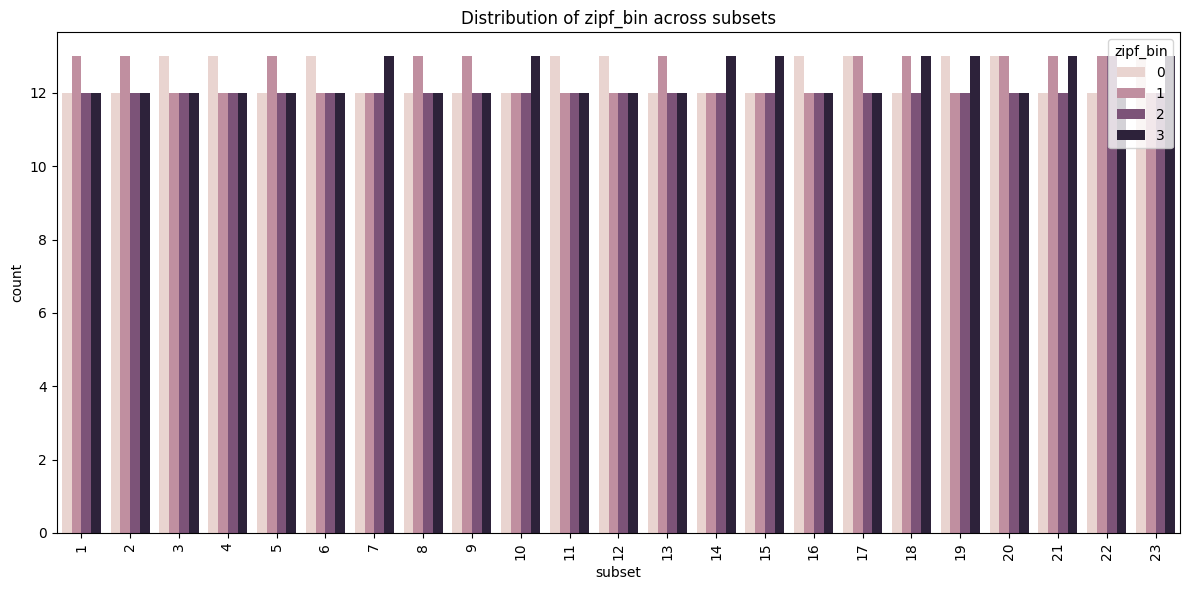

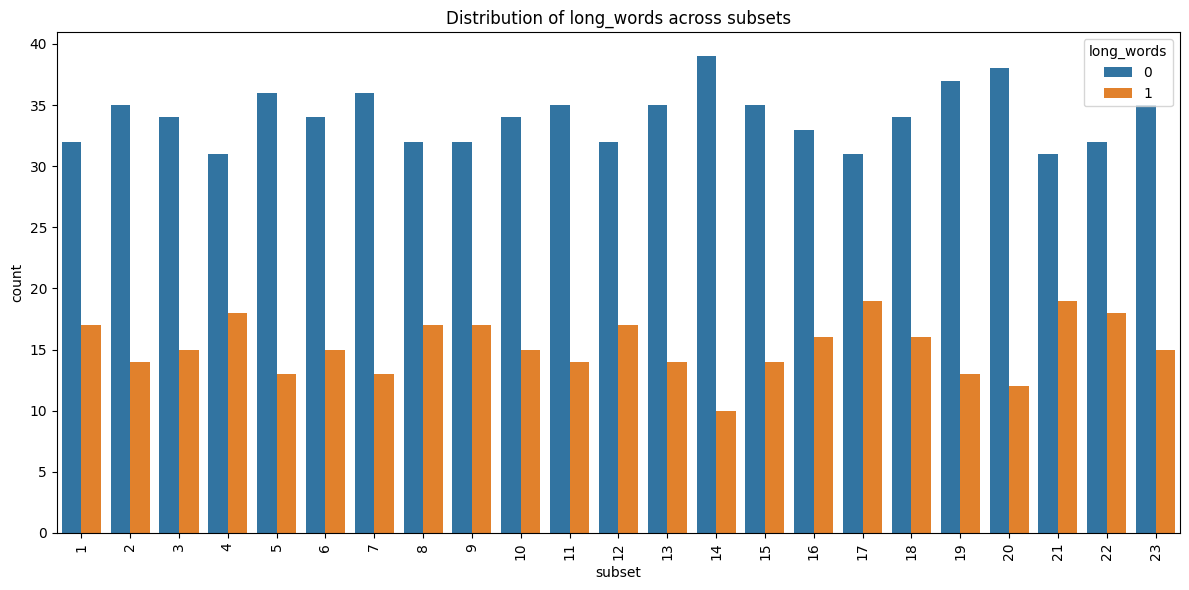

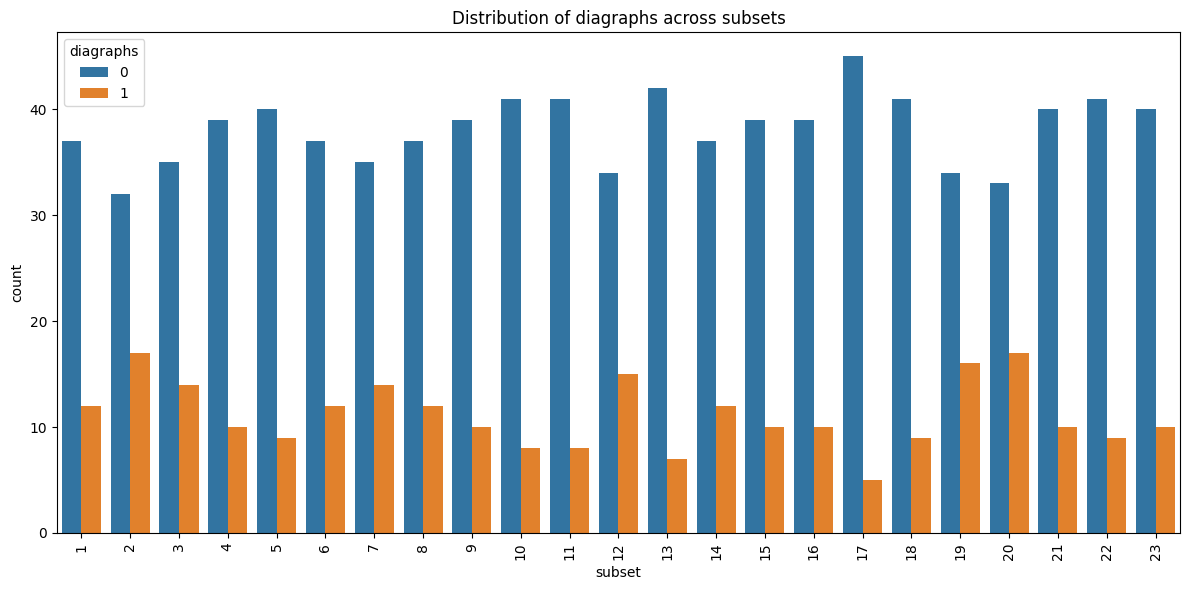

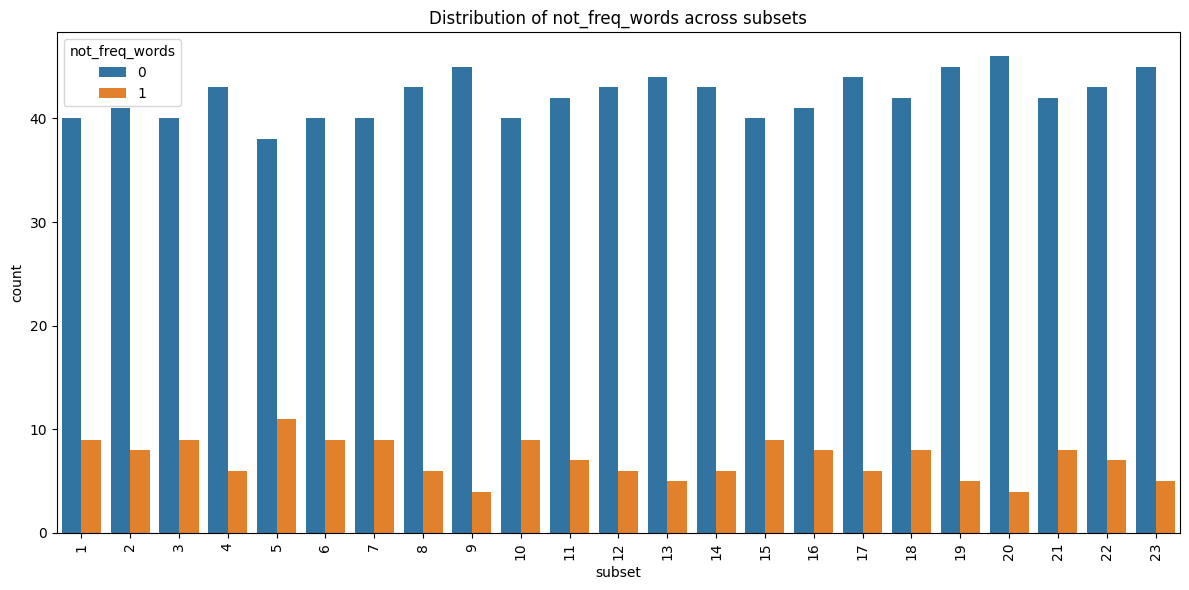

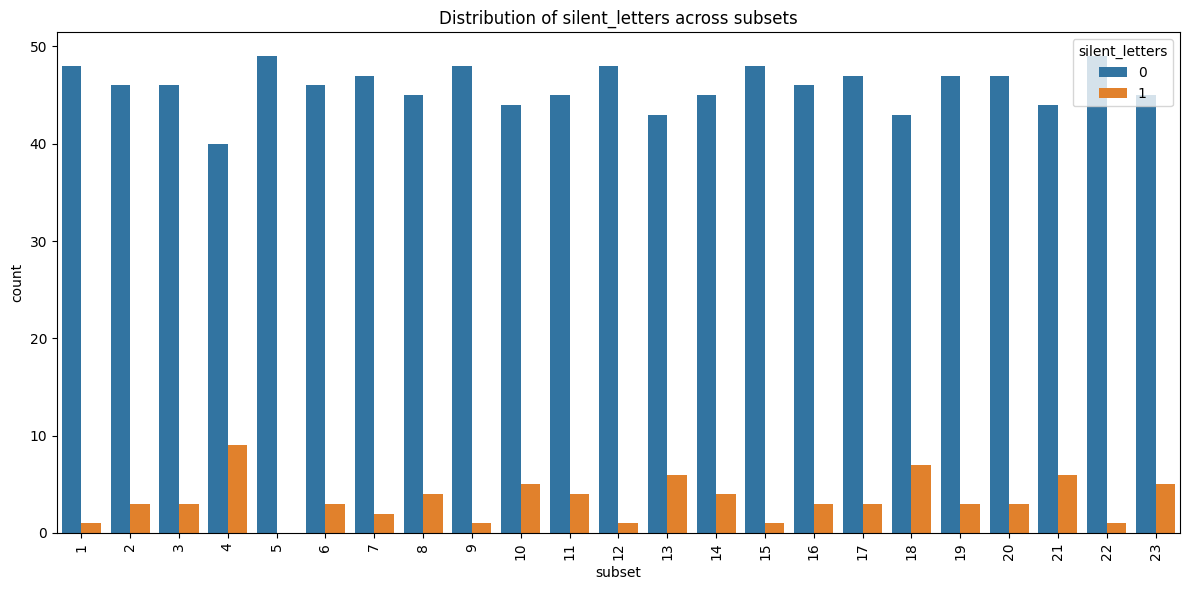

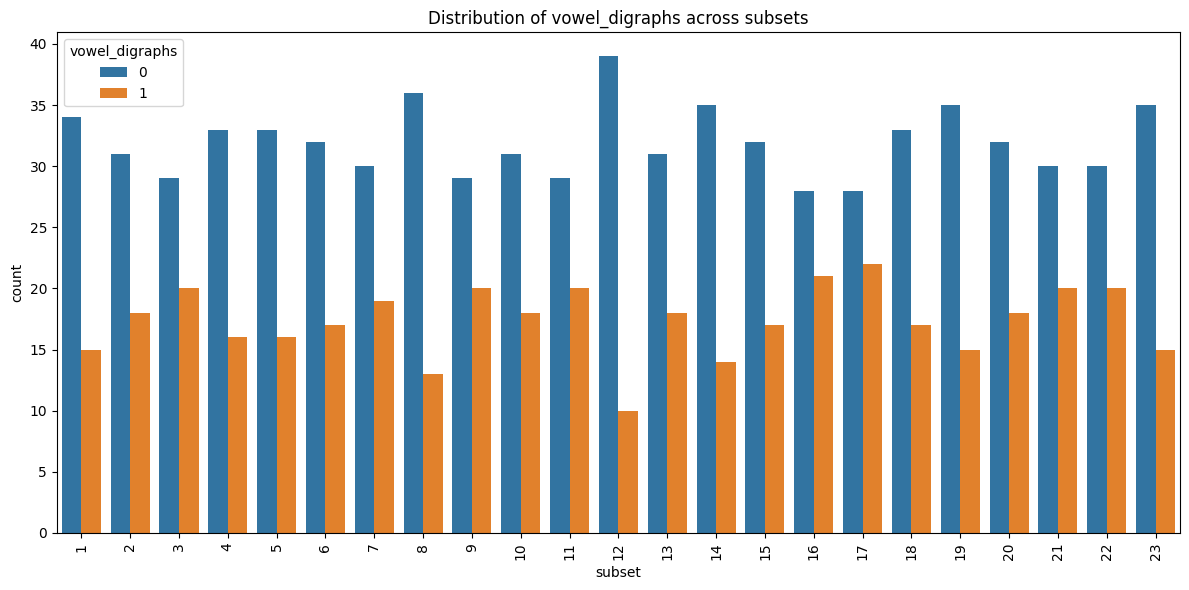

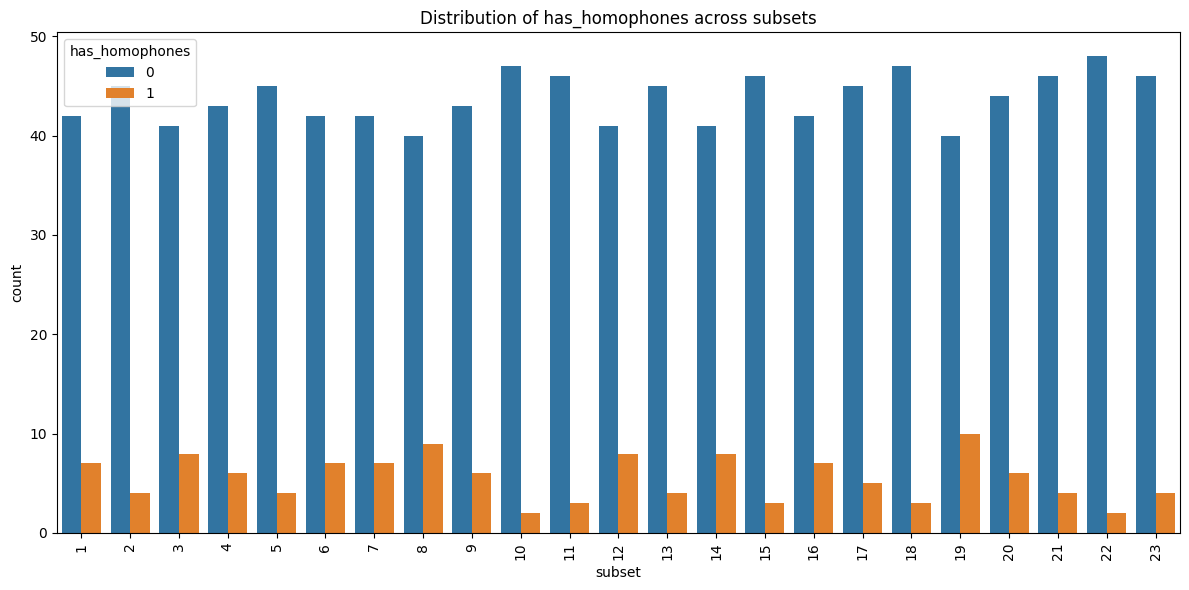

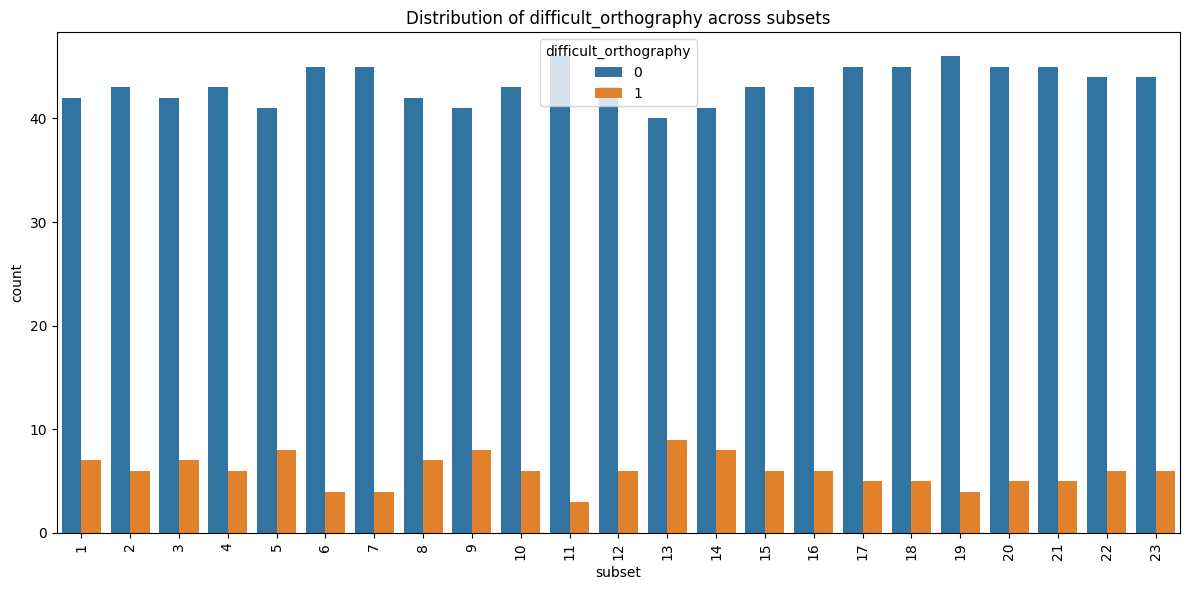

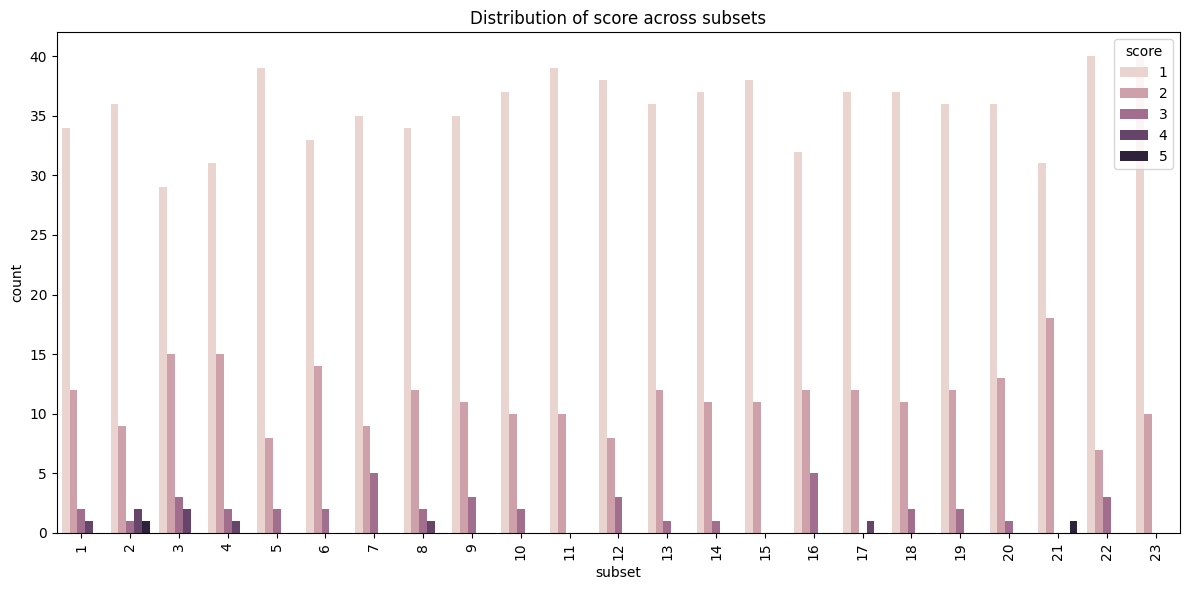

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'challenging_words_with_subsets.xlsx'
df = pd.read_excel(file_path)

variables_to_check = ['zipf_bin'] + [col for col in df.columns if col not in ['word', 'subset', 'zipf_bin', 'zipf']]

for var in variables_to_check:
    plt.figure(figsize=(12, 6))
    if df[var].nunique() <= 10:
        sns.countplot(data=df, x='subset', hue=var)
    else:
        sns.boxplot(data=df, x='subset', y=var)
    plt.title(f'Distribution of {var} across subsets')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
import pandas as pd
import json

# Load the Excel file
df = pd.read_excel('/content/challenging_words_with_subsets.xlsx')

# Convert dataframe to list of dictionaries
data = df.to_dict(orient='records')

# Save to JSON file
with open('output.json', 'w') as json_file:
    json.dump(data, json_file, indent=2)

print("JSON file 'output.json' has been created.")